Continua√ß√£o do jupyter anterior. 

        01-Perceptron-iris.ipynb
        
----------------------------------------------------------------------------------------------------------------


Breve descri√ß√£o:

O problema que resolveremos com o perceptron envolve a classifica√ß√£o das esp√©cies de √≠ris com base em suas caracter√≠sticas morfol√≥gicas. Especificamente, usaremos o perceptron para distinguir entre duas das tr√™s esp√©cies de √≠ris no dataset. 

No jupyter anterior usamos a biblioteca numpy para criar do zero um perceptron. Agora iremos utizar alguns ferramenta mais sofistica que iram faciliar todo o processo. 

* 1 - Aprendendo a criar um classe no numpy 

*  * 1.1 - Como criar um classe perceptron.
*  * 1.2 - treinando o perceptron.

*  2 - Introdu√ß√£o a bilbioteca Pytorch.
*  * 2.1 - Aprendendo a criar um perceptron.
*  * 2.2 - Como treinar um perceptron.
*  * 2.3 - Como Treinar utilizando a GPU.



# 1 - Aprendendo a criar um classe no numpy 

## 1.0 Para quem n√£o sabe oque √© classe ou programa√ß√£o orientada a objeto.

Introdu√ß√£o √†s Classes em Python

Python √© uma linguagem de programa√ß√£o orientada a objetos, o que significa que ela suporta o uso de classes para organizar c√≥digo em componentes reutiliz√°veis. Uma classe √© como um blueprint para criar objetos; um objeto √© uma inst√¢ncia de uma classe. Com classes, podemos modelar dados e funcionalidades complexas de maneira intuitiva e acess√≠vel.

```python
*Definindo uma Classe*

    Uma classe √© definida usando a palavra-chave class, seguida pelo nome da classe e dois pontos. Dentro da classe, definimos fun√ß√µes que s√£o chamadas de m√©todos. O m√©todo `__init__()` √© especial: ele √© o construtor da classe e √© chamado automaticamente quando um novo objeto da classe √© criado.


class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

Neste exemplo, Carro √© uma classe com um m√©todo __init__() que inicializa tr√™s atributos: marca, modelo e ano. A palavra self √© uma refer√™ncia √† inst√¢ncia atual da classe e √© usada para acessar vari√°veis que pertencem √† classe. Para criar uma inst√¢ncia de uma classe, voc√™ chama a classe usando o nome da classe seguido por par√™nteses, passando os argumentos que o m√©todo __init__() aceita:

*Criando a inst√¢ncia:*

meu_carro = Carro('Ford', 'Mustang', 2020)

Aqui, meu_carro √© um objeto da classe Carro. Podemos adicionar outros m√©todos √† classe para definir comportamentos adicionais:

class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

    def descricao(self):
        return f"{self.ano} {self.marca} {self.modelo}"

    def idade(self, ano_atual):
        return ano_atual - self.ano

Agora, a classe Carro tem dois m√©todos adicionais: descricao() que retorna uma string descrevendo o carro, e idade(), que calcula a idade do carro.


*Heran√ßa:* permite que uma classe herde atributos e m√©todos de outra classe. Isso √© √∫til para criar subcategorias que compartilham funcionalidades comuns.

class CarroEletrico(Carro):
    def __init__(self, marca, modelo, ano, autonomia):
        super().__init__(marca, modelo, ano)
        self.autonomia = autonomia

    def descricao_bateria(self):
        return f"Este carro tem uma autonomia de {self.autonomia} km ap√≥s uma carga completa."


A classe 'CarroEletrico' herda de 'Carro' e adiciona um novo atributo autonomia, al√©m de um novo m√©todo para descrever a bateria. Note que nesse caso temos 'super().__init__( .... )' este comando nos permite utilizar os metodos definido na class Carro().

## 1.1 - Como criar um classe perceptron.

In [1]:
# Importa√ß√£o das bibliotecas necess√°rias
import numpy as np  # Biblioteca para opera√ß√µes num√©ricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para cria√ß√£o de gr√°ficos e visualiza√ß√µes

from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
class Perceptron:
    def __init__(self,Entrada):
        self.input = Entrada

        # Inicializa√ß√£o dos pesos e bias
        self.weights = np.random.randn(Entrada.shape[1])
        self.bias = np.random.randn(1)

    def pegar_pesos_bias(self):
        return self.weights,self.bias


Criamos um classe chamada perceptron que criar os pesos e bias. Tamb√©m definimos um metodo que devolve quais s√£o os pesos e bias.

In [3]:
#x = np.array( [[0,1,2,3]])
x = np.ones((10,4))
neuronio = Perceptron(x)
neuronio

In [4]:
neuronio.pegar_pesos_bias()

(array([-0.51005478, -1.06770523,  0.25284589, -0.64802084]),
 array([1.31758327]))

No jupyter anterior, nos aprendendo que o perceptron tem varias outras fun√ß√µes.

Iremos implementar as outras partes como metodos dentro da clalsse perceptron

In [5]:
class Perceptron:
    def __init__(self, Entrada):
        """
        Inicializa o perceptron com entradas, pesos aleat√≥rios e bias.
        """
        self.weights = np.random.randn(Entrada.shape[1])  # pesos inicializados aleatoriamente
        self.bias = np.random.randn(1)  # bias inicializado aleatoriamente

    def pegar_pesos_bias(self):
        """
        Retorna os pesos e bias do perceptron.
        """
        return self.weights, self.bias
    
    def sigmoid(self, z_):
        """
        Fun√ß√£o de Ativa√ß√£o Sigm√≥ide.
        """
        return 1 / (1 + np.exp(-z_))
    
    def forward(self,x_):
        """
        Realiza a propaga√ß√£o direta (forward pass) atrav√©s de um perceptron simples.
        """
        # Aplica√ß√£o da fun√ß√£o sigmoid para obter a probabilidade. 
        return self.sigmoid(np.dot(x_, self.weights) + self.bias ) 
        
    def derivada_sigmoid(self, s_):
        """
        Derivada da Fun√ß√£o Sigm√≥ide.
        """
        return s_ * (1 - s_)
    

    def derivada_erro_quadratico_medio(self,y_pred, y_true):
        """
        Derivada do Erro Quadr√°tico M√©dio.

        """
        return 2 * (y_pred - y_true) / y_true.size
    
    def backpropagation(self,x_,y_ ,y_pred, learning_rate):
        """
        Algoritmo de Backpropagation.

        """
        # Derivada do erro
        d_error = self.derivada_erro_quadratico_medio(y_pred, y_)
        
        # Derivadas da fun√ß√£o de ativa√ß√£o
        d_sigmoid = self.derivada_sigmoid(y_pred)
        
        # Gradientes
        d_weights = np.dot(x_.T, d_error * d_sigmoid)
        #d_weights = np.dot(x_, (d_error * d_sigmoid))  # Remove a transposta se x_ j√° estiver no formato correto
        d_bias = np.sum(d_error * d_sigmoid)
  
        # Atualiza√ß√£o dos pesos e bias
        self.weights -= learning_rate * d_weights
        self.bias -= learning_rate * d_bias

def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadr√°tico M√©dio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decis√£o para um modelo de classifica√ß√£o bin√°ria junto com os dados de entrada.
    
    """
    # Definir os limites do gr√°fico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = neuronio.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

In [6]:
# Carregar o dataset Iris
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza √≠ndices das classes 0 e 2
X = X[indices] 
y = y[indices] 

y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normaliza√ß√£o dos dados para melhor desempenho do modelo
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


# Instanciando a classe Perceptron
neuronio = Perceptron(Entrada=X_train)
neuronio

In [7]:
neuronio.pegar_pesos_bias() # Pesos criados

(array([ 1.58517707,  0.49961877, -0.99204341, -1.82573185]),
 array([-0.86989544]))

In [8]:
y_pred = neuronio.forward(X_train) 
y_pred

array([0.19772586, 0.07151213, 0.6379925 , 0.47175554, 0.04631902,
       0.95045579, 0.73612912, 0.04889974, 0.66473804, 0.20963584,
       0.65405829, 0.54125095, 0.19811038, 0.79935381, 0.07385886,
       0.85459691, 0.11111311, 0.05227986, 0.71314626, 0.87647868,
       0.71841366, 0.61929626, 0.73294057, 0.06899968, 0.81080472,
       0.81073414, 0.58432428, 0.61826071, 0.10112213, 0.44424783,
       0.62143471, 0.49955086, 0.75798012, 0.41259175, 0.37274989,
       0.0421595 , 0.55172042, 0.01145032, 0.88470861, 0.13530379,
       0.0097998 , 0.05377049, 0.04686973, 0.57221793, 0.02494909,
       0.37235128, 0.8328012 , 0.09489928, 0.06260957, 0.08834802,
       0.33506515, 0.22636262, 0.07617139, 0.86508666, 0.04609094,
       0.21857846, 0.28186542, 0.91479624, 0.05349322, 0.13153829,
       0.01563502, 0.07825376, 0.79116854, 0.55822877, 0.60194486,
       0.13183417, 0.7570893 , 0.59272951, 0.59009378, 0.10696482,
       0.10818568, 0.11090315, 0.04072743, 0.03485305, 0.82729

In [9]:
neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.01)
neuronio.pegar_pesos_bias()# Novos pesos e bias.

(array([ 1.58703525,  0.49886884, -0.99010935, -1.82388756]),
 array([-0.8703028]))

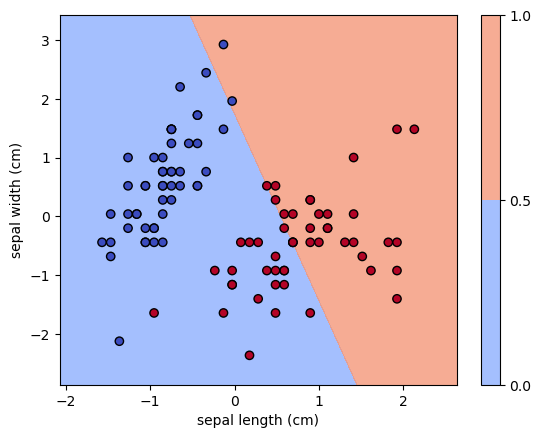

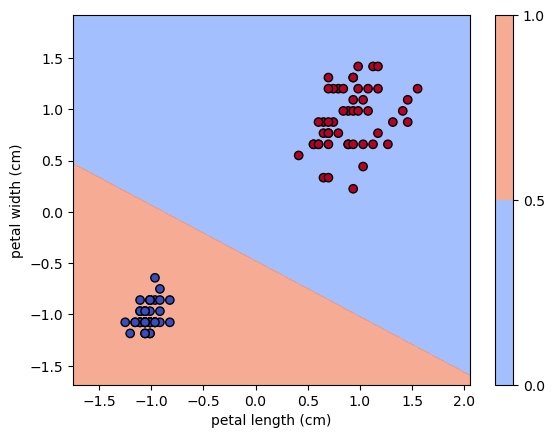

In [10]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipot√©tico)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decis√£o e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

## 1.2 - treinando o perceptron.

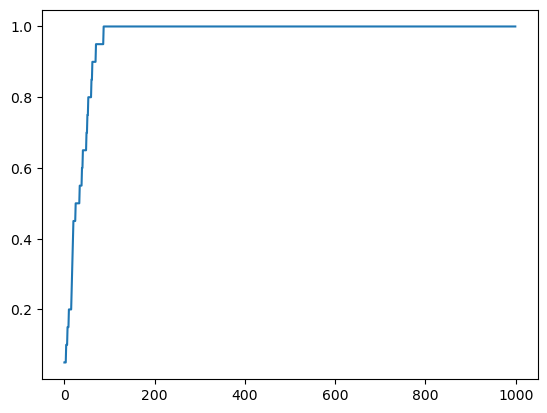

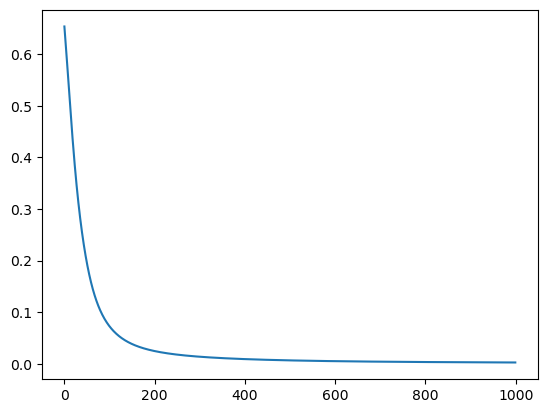

In [11]:

Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(1000):
    y_pred = neuronio.forward(X_train)
    neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.1)
    mse  = erro_quadratico_medio(y_train, y_pred)
    
    y_pred_test = [1 if neuronio.forward(i) > 0.5 else 0 for i in X_test]

    accuracy = accuracy_score(y_test, y_pred_test)
    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avalia√ß√£o
plt.plot(Loss_acuracia);plt.show()
plt.plot(Loss_mse)
plt.show()

In [12]:
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.
weights

(array([ 2.48674281, -1.23794351,  1.07238932,  0.45991255]),
 array([0.41093476]))

In [13]:
weights[0]

array([ 2.48674281, -1.23794351,  1.07238932,  0.45991255])

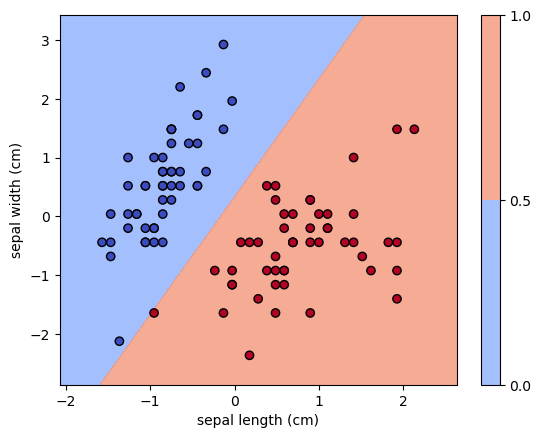

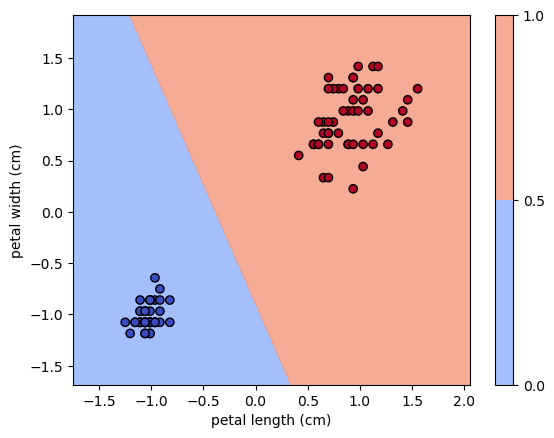

In [14]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipot√©tico)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decis√£o e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

# 2 - Introdu√ß√£o a bilbioteca Pytorch.

# Introdu√ß√£o ao PyTorch üöÄ

![PyTorch Logo](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

## O que √© PyTorch?

PyTorch √© uma biblioteca de aprendizado de m√°quina de c√≥digo aberto desenvolvida pelo Facebook's AI Research lab (FAIR). Desde o seu lan√ßamento, tornou-se uma das ferramentas mais populares entre os pesquisadores e engenheiros de aprendizado de m√°quina devido √† sua flexibilidade e efici√™ncia. PyTorch √© especialmente conhecido por sua facilidade de uso e a capacidade de facilitar a prototipagem r√°pida.

## Para que serve PyTorch?

PyTorch serve a v√°rios prop√≥sitos no campo do aprendizado de m√°quina e deep learning:

### 1. **Flexibilidade no Design de Modelos:** üí°
   - **Autograd:** PyTorch oferece um sistema din√¢mico de gradiente autom√°tico (Autograd) que permite modifica√ß√µes flex√≠veis e intuitivas em grafos de computa√ß√£o durante a execu√ß√£o. Isso √© particularmente √∫til para designs experimentais onde ajustes frequentes nos modelos s√£o necess√°rios.

### 2. **Facilita a Experimenta√ß√£o:** üß™
   - **Simplicidade e Intuitividade:** A interface simples de usar permite que desenvolvedores e pesquisadores construam prot√≥tipos de modelos de deep learning rapidamente, o que acelera o processo de experimenta√ß√£o e desenvolvimento.

### 3. **Desempenho em Treinamento de Modelos:** ‚öôÔ∏è
   - **GPU Acceleration:** PyTorch oferece suporte extenso para acelera√ß√£o via GPUs, o que torna poss√≠vel o treinamento de modelos complexos de forma mais r√°pida. A integra√ß√£o com CUDA garante que o processo seja eficiente e escal√°vel.

### 4. **Aplica√ß√µes Pr√°ticas:** üè≠
   - **De Pesquisas Acad√™micas a Produ√ß√£o:** PyTorch n√£o s√≥ facilita a pesquisa e o desenvolvimento acad√™mico, mas tamb√©m √© eficaz na implementa√ß√£o de solu√ß√µes em produ√ß√£o. Isso √© poss√≠vel gra√ßas ao TorchScript, que √© uma forma de converter modelos PyTorch em formatos que podem ser otimizados para ambientes de produ√ß√£o.

Para mais informa√ß√µes, visite o [site oficial do PyTorch](https://pytorch.org/).


## 2.1 - Aprendendo a criar um perceptron.

* 1¬∫ - Importar as bibliotecas necess√°rias: Vamos precisar de torch para as opera√ß√µes tensoriais e torch.nn para as camadas e modelos de redes neurais.

* 2¬∫ - Definir a classe do Perceptron: Criaremos uma classe que herda de torch.nn.Module. Nesta classe, definiremos a camada linear (pesos e bias). Forward Pass: Definiremos o m√©todo forward que realiza a passagem direta (c√°lculo da sa√≠da) do perceptron.

* 3¬∫ - Inicializar o Perceptron: No construtor da classe, inicializaremos a camada linear.

In [15]:
# 1¬∫ Passo
import torch as tc
import torch.nn as nn

In [16]:
# 2¬∫passo
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        saida =1
        
        # Define a camada linear com input_dim entradas e 1 sa√≠da.
        self.calculo_linear = nn.Linear(input_dim, saida)
        
        # Definir a fun√ß√£o n√£o linear.
        self.funcao_de_ativacao = nn.Sigmoid()

    def forward(self, x):
        return self.funcao_de_ativacao(self.calculo_linear(x))

Uma parte importante dentro do perceptron √© dada pela fun√ßao "nn.Linear(input_dim, 1)".

Ela √© responsavel pela parte matematica eq.(2) descrita no artigo. Para o codigo √© importante saber que input_dim= √© o n√∫meros de entradas(em nosso problema 4) e a saida, como o propio nome indica,  √© o n√∫mero de saidas do perceptron.

In [17]:
X_train.shape

(80, 4)

In [18]:
# 3¬∫ passo
perceptron = Perceptron(input_dim=X_train.shape[-1])
# A dimens√£o do inpute deve ser igual ao numero de colunas do seu dataset
# ou igual ao n√∫mero de caracteristica.
# Para o banco de dados de iris, o primeiro termo do X_train.shape
# √© o numero de dados, o segundo √© o n√∫mero de colunas. 



Se tentamos executar o metodo forward com os data set de iris , iremos ter probremas .
Devido ao tipo dos dados

In [19]:
type(X_train)

numpy.ndarray

Precismao que o todo os dados estejam no formato da biblioteca do pytorch(tensor), portanto iremos converter as variaveis de treino e teste

In [20]:
tc.tensor(X_train[0])

tensor([ 1.8202, -0.4416,  1.4105,  0.9838], dtype=torch.float64)

In [21]:
X_train = tc.tensor(X_train, dtype=tc.float32)
X_test  = tc.tensor(X_test, dtype=tc.float32)
y_train = tc.tensor(y_train, dtype=tc.float32)
y_test  = tc.tensor(y_test, dtype=tc.float32) 

Note que foi convertido para um tipo de variavel especifico dtype=tc.float32 que √© o modo padr√£o que as variaveis s√£o convertidas. 

Normalmente n√£o precisamos especificar, mas nesse caso precismos pois a variavel est√£o sendo convertida para dtype=tc.float64, ocupando espa√ßo na memoria desnecessario para nosos tipo de aplica√ß√£o. Portanto √© um boa pratic, neste caso, restrigir o tamanho da variavel e conseguintemente liberar espa√ßo na memoria.

In [22]:
X_train[0]

tensor([ 1.8202, -0.4416,  1.4105,  0.9838])

Com os dados convertidos para tensores, podemos inserir dentro do perceptron

In [23]:
saida = perceptron(X_train)
saida[0:5]

tensor([[0.4271],
        [0.4157],
        [0.3629],
        [0.3736],
        [0.5358]], grad_fn=<SliceBackward0>)

Naturalmente quando eu adicionar os dados de traino do arguimento do perceptron, ele j√° executa a metodo forward. Na celula acima estamos exibindo apenas as 5 primeira saida, referentes aos 5 primeiros valores de entrada.

In [24]:
saida.shape

torch.Size([80, 1])

Outro detalhe importante , √© que a saida do perceptrontem formado [80, 1], logo o y_train deve ter o mesmo formato.
Note que

In [25]:
y_train.shape

torch.Size([80])

Para reformat iremos usar :

In [26]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## 2.2 - Como treinar um perceptron.

Agora iremos realizar o treinamento.

Uma parte do procedimento √© igual aos casos anteriores,mas temos que especifivar algus pontos cmo o otimizador e a fun√ß√£o custo.

In [27]:
# Definir a fun√ß√£o de perda e o otimizador
funcao_custo = nn.MSELoss()  # Erro quadrado medio
optimizer = tc.optim.SGD(perceptron.parameters(), lr=0.01)  # Otimizador gradiente Descendente Estocatico

In [28]:
# Treinar o perceptron
num_epochs = 5000  # N√∫mero de √©pocas para treinar
print_interval = num_epochs // 10  # Calcula o intervalo para imprimir 10 vezes
for epoch in range(num_epochs):
    # Zerar os gradientes do otimizador
    optimizer.zero_grad()

    # Forward pass: Calcular a previs√£o do perceptron
    outputs = perceptron(X_train)

    # Calcular a perda
    loss = funcao_custo(outputs, y_train)

    # As duas etapas seguinte s√£o passos do backpropagation
    # Backward pass: Calcular os gradientes
    loss.backward()

    # Atualizar os pesos
    optimizer.step()

    # Printar a perda
    # Condi√ß√£o para imprimir a perda 10 vezes durante o treinamento
    if (epoch % print_interval == 0) or (epoch == num_epochs - 1):
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5000], Loss: 0.2380
Epoch [501/5000], Loss: 0.0359
Epoch [1001/5000], Loss: 0.0174
Epoch [1501/5000], Loss: 0.0114
Epoch [2001/5000], Loss: 0.0084
Epoch [2501/5000], Loss: 0.0067
Epoch [3001/5000], Loss: 0.0056
Epoch [3501/5000], Loss: 0.0048
Epoch [4001/5000], Loss: 0.0042
Epoch [4501/5000], Loss: 0.0037
Epoch [5000/5000], Loss: 0.0033


Vamos visular os resutlados 

## 2.3 - Como Treinar utilizando a GPU.

In [ ]:
# Importa√ß√£o das bibliotecas necess√°rias
import numpy as np  # Biblioteca para opera√ß√µes num√©ricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para cria√ß√£o de gr√°ficos e visualiza√ß√µes
from sklearn import datasets  # M√≥dulo para carregar conjuntos de dados pr√©-definidos
from sklearn.model_selection import train_test_split  # Fun√ß√£o para dividir dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Ferramenta para normaliza√ß√£o dos dados
from sklearn.metrics import accuracy_score  # Fun√ß√£o para calcular a acur√°cia de modelos

#### Alguns resultados com inicializa√ß√£o aleat√≥ria e sem treinamento

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()  # Carrega o dataset Iris do sklearn
X = iris.data  # Matriz de caracter√≠sticas/features do dataset
y = iris.target  # Vetor de r√≥tulos/targets correspondente

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza √≠ndices das classes 0 e 2
X = X[indices]  # Filtra X para incluir apenas as amostras das classes 0 e 2
y = y[indices]  # Filtra y da mesma forma

# Como o dataset original codifica Iris Setosa como 0 e Iris Virginica como 2,
# voc√™ pode querer re-codificar os r√≥tulos para simplificar (opcional):
y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0
# Isso simplifica o problema para uma classifica√ß√£o bin√°ria entre as classes 0 e 1.

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 significa que 20% dos dados ser√£o usados para teste, o resto para treinamento.
# random_state=42 garante reprodutibilidade, usando sempre a mesma divis√£o.

# Normaliza√ß√£o dos dados para melhor desempenho do modelo
scaler = StandardScaler()  # Inicializa o objeto StandardScaler
X_train = scaler.fit_transform(X_train)  # Calcula m√©dia e desvio padr√£o e transforma os dados de treinamento
X_test = scaler.transform(X_test)  # Aplica a mesma transforma√ß√£o nos dados de teste


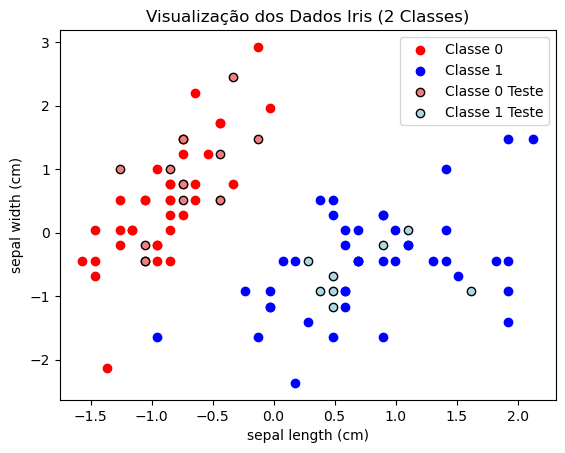

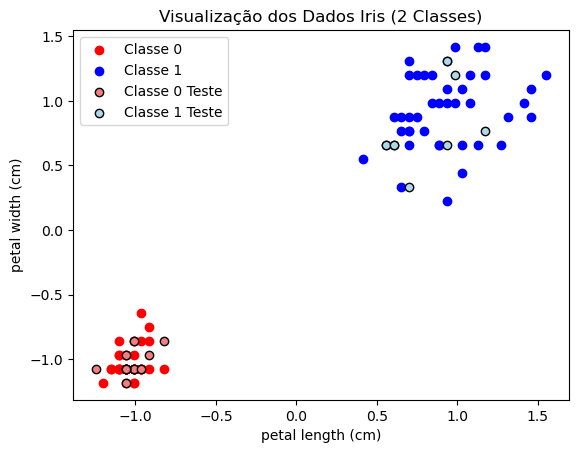

In [ ]:
# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[0]}')
plt.ylabel(f'{iris.feature_names[1]}')
plt.title('Visualiza√ß√£o dos Dados Iris (2 Classes)')
plt.legend()
plt.show()

# Plot dos dados de treino
plt.scatter(X_train[y_train == 0][:, 2], X_train[y_train == 0][:, 3], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 2], X_train[y_train == 1][:, 3], color='blue', label='Classe 1')

# Plot dos dados de teste
plt.scatter(X_test[y_test == 0][:, 2], X_test[y_test == 0][:, 3], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(X_test[y_test == 1][:, 2], X_test[y_test == 1][:, 3], color='lightblue', label='Classe 1 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Visualiza√ß√£o dos Dados Iris (2 Classes)')
plt.legend()
plt.show()


Vamos gerar os pesos e bias para ilustra como fica o modelo sem treinamento

In [ ]:
#Para sempre gerar os mesmo numero aleatorios
np.random.seed(10)
# Inicializa√ß√£o dos pesos e bias
weights = np.random.randn(X_train.shape[1])
bias = np.random.randn()
print(" Valores do pesos:",weights,"\n Valores do bias:",bias)

 Valores do pesos: [ 1.3315865   0.71527897 -1.54540029 -0.00838385] 
 Valores do bias: 0.6213359738904805


Vamos definir um fun√ßao para visualaizar os dados e com os pesos gerados inicialmente classificam os dados

In [ ]:
def sigmoid(z):
    """
    Fun√ß√£o de Ativa√ß√£o Sigm√≥ide.

    """
    return 1 / (1 + np.exp(-z))

def derivada_sigmoid(z):
    """
    Derivada da Fun√ß√£o Sigm√≥ide.

    """
    s = sigmoid(z)
    return s * (1 - s)

def derivada_erro_quadratico_medio(y_pred, y_true):
    """
    Derivada do Erro Quadr√°tico M√©dio.
    
    :param y_pred: Vetor de predi√ß√µes do modelo.
    :param y_true: Vetor de valores verdadeiros.
    :return: Vetor de derivadas do erro quadr√°tico m√©dio.
    """
    return 2 * (y_pred - y_true) / y_true.size

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decis√£o para um modelo de classifica√ß√£o bin√°ria junto com os dados de entrada.
    
    :param X: Matriz de caracter√≠sticas dos dados de entrada.
    :param y: Vetor de r√≥tulos verdadeiros (classes).
    :param model_weights: Vetor de pesos do modelo de classifica√ß√£o.
    :param model_bias: Bias do modelo de classifica√ß√£o.
    :param indice_f1: √çndice da primeira caracter√≠stica a ser usada no plot (padr√£o √© 0).
    :param indice_f2: √çndice da segunda caracter√≠stica a ser usada no plot (padr√£o √© 1).
    """
    # Definir os limites do gr√°fico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')
    plt.title('Decision Boundary and Data Points')


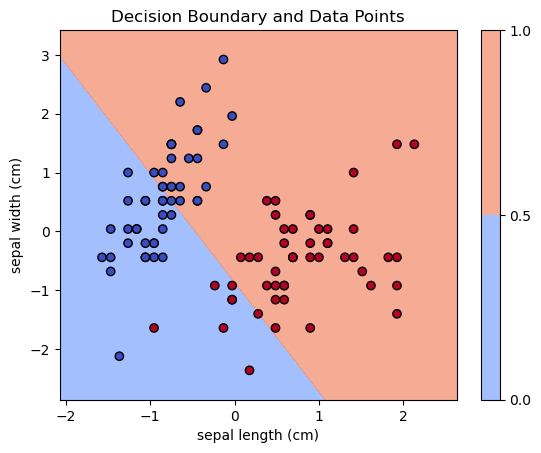

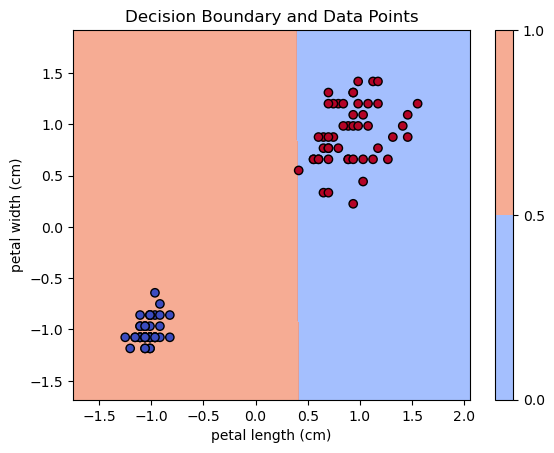

In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Dados do modelo (hipot√©tico)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu vi√©s real
# Plotar a fronteira de decis√£o e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

#### Definindo fun√ß√µes de treinamento (backpropagation)

In [ ]:
def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadr√°tico M√©dio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def forward(X, weights, bias):
    """
    Realiza a propaga√ß√£o direta (forward pass) atrav√©s de um perceptron simples.
    """
    z = np.dot(X, weights) + bias  # Combina√ß√£o linear das entradas com os pesos e o bias
    return sigmoid(z)  # Aplica√ß√£o da fun√ß√£o sigmoid para obter a probabilidade

def backpropagation(X, y, y_pred, weights, bias, learning_rate):
    """
    Algoritmo de Backpropagation.
    
    :param X: Matriz de caracter√≠sticas dos dados de entrada.
    :param y: Vetor de r√≥tulos verdadeiros.
    :param y_pred: Vetor de predi√ß√µes do modelo.
    :param weights: Vetor de pesos atual do modelo.
    :param bias: Bias atual do modelo.
    :param learning_rate: Taxa de aprendizado, controla o tamanho do passo na atualiza√ß√£o.
    :return: Tupla contendo os pesos e bias atualizados.
    """
    # Derivada do erro
    error = y_pred - y
    d_error = derivada_erro_quadratico_medio(y_pred, y)
    
    # Derivadas da fun√ß√£o de ativa√ß√£o
    z = np.dot(X, weights) + bias
    d_sigmoid = derivada_sigmoid(z)
    
    # Gradientes
    d_weights = np.dot(X.T, d_error * d_sigmoid)
    d_bias = np.sum(d_error * d_sigmoid)
    
    # Atualiza√ß√£o dos pesos e bias
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

    return weights, bias

Vamos iniciar o treinamento

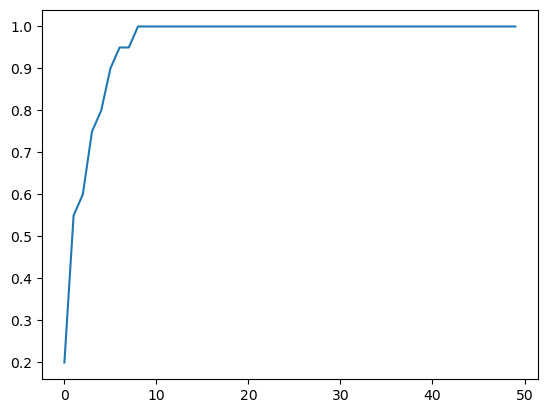

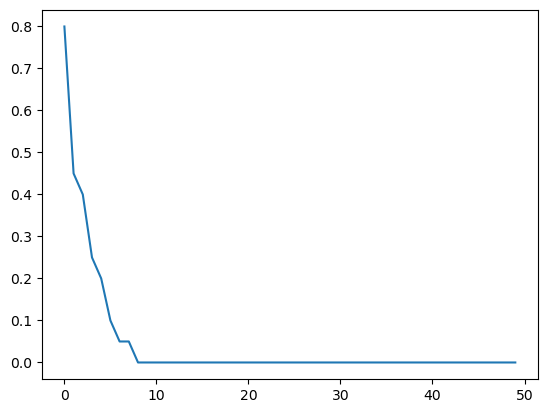

In [ ]:
Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(50):
    for x, y in zip(X_train, y_train):
        y_pred = forward(x, weights, bias)
        weights, bias = backpropagation(x, y, y_pred, weights, bias, learning_rate=0.01)

    y_pred_test = [forward(x, weights, bias) > 0.5 for x in X_test]
    accuracy = accuracy_score(y_test, y_pred_test)
    mse  = erro_quadratico_medio(y_test, y_pred_test)

    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avalia√ß√£o
plt.plot(Loss_acuracia);plt.show()
plt.plot(Loss_mse)
plt.show()

Vamos visualizar o resultados dos parametros treinados

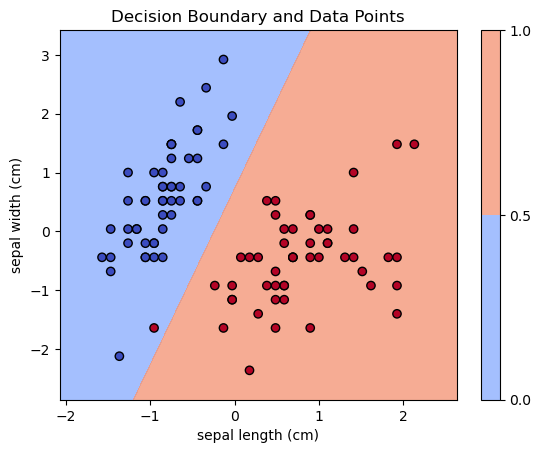

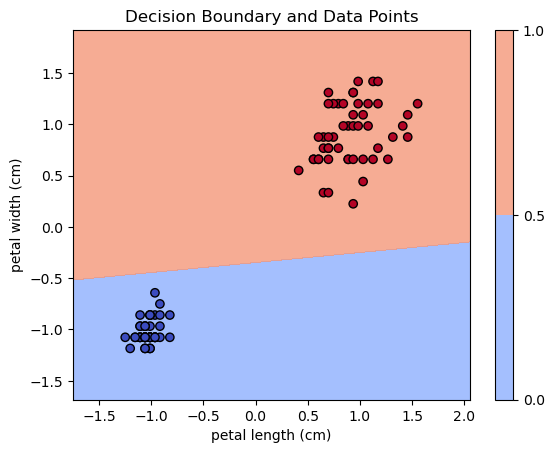

In [ ]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipot√©tico)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu vi√©s real
# Plotar a fronteira de decis√£o e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()